# Experimental Design and Analysis Overview

### Design Overview

For this study, we purchased 3 pots of basil and harvested stalks from each pot.
We then randomized the stalks to each of 4 treatments, blocking by pot so that
each treatment received at least one stalk from each pot. The four treatments 
were the 2x2 combinations of placing the basil in the fridge and placing 
the stalks in water. Each day, photos were taken of each of the plants. 
At the end of the study (5 days), we will conduct a blinded freshness assessment
where one member of the group will present leaves from the plants to the
other three participants in a randomized order to be judged on the firmness of
the leaves and the apparent freshness of the herb based on smell/taste. 
Ther are 3 plants, and each plant will receive a score from 1 to 5 
by each judge based on these qualities, so that each plant has 3 scores.

Additionally, soon after the start of the experiment we noticed that the stems 
placed in the fridge were wilting significantly, and we were concerned that this
may reduce the power of the comparison for the water treatment. Consequently,
we chose to purchase 3 more pots of basil and conduct another experiment with
only the water treatment (no plants were placed in the fridge). The treatment
assignment was blocked by pot, and within each pot 4 stems were assigned the
water treatment and 4 were given nothing. Both experiments were conducted for 5 days.
To distinguish the two experiments, we will refer to the first as 'Experiment A'
and the second as 'Experiment B'.

### Analysis Plan

Before conducting a formal test, we will do an exploratory data analysis
to understand the outcome data. We plan to make boxplots comparing
the average scores for each treatment from the freshness test, as
well as for the other outcomes measured, but more visualizations may
be created if necessary.

#### Permutation Testing
Since 'freshness' is a subjective quality, our primary method of comparison
is the freshness rating from the blind judging, which we feel would most
reliably reflect the likelihood a person would be willing to cook with
or consume the basil. To assess the freshness for each plant, we will
average the scores given by the 3 judges for that plant. Then, we will
average those means across the plants within a treatment group to obtain
a freshness score for the treatment group. We will test for a treatment effect 
with both the water and fridge treatments, conditional on the presence of the 
other treatment, using the difference of the average scores for the two groups,
using a permutation test.

For testing the fridge treatment, we will permute the average scores for
the two treatments (fridge vs no fridge) conditioning on the treatment
assignment for the water treatment and blocked by pot. For a given level
of the water treatment and a given pot, the fridge treatment assignment
labels will be permuted for all the experimental units within that group,
and after a full permutation is computed, the difference in average
scores between the levels of the fridge treatment will be computed. We
will do this for 100,000 permutations to simulate the strong null
distribution and compute a p-value for the actual outcome of the experiment.

For testing the water treatment, we will do the same as the above but
swap the roles of the water and fridge treatments. We will also pool
the data for both experiments, blocking by pot as before.

Since we are conducting two tests, we will use a Bonferroni adjustment
to account for the multiplicity. The presence or absence of a
treatment effect for the water and fridge treatments will be judged
on these results. However, we also plan to conduct further
permutation tests on the other outcomes as a supplement to compare
and contrast the results from different outcomes.

#### Image Analysis
To analyze the images, we will process each image so that the background is white,
and then use a segmentation algorithm to determine the portion of the image
corresponding to plant matter. We will then compute a metric that spots high RGB values and saturation and low value of the B channel in the LAB color space of all the pixels in this image, and subtract this from the average value
of the plant at day 0 (the start of the experiment).

We will conduct a permutation test with the same randomization scheme as
described above, but using the difference in average RGB changes as
the test statistic.

#### Weight analysis
We will conduct a permutation test on the difference in average
weight changes as well. However, this may have low power due
to difficulty in accurately measuring the weight of the stems,
which are very light.

# Experiment A Lab Notes

## Setup
Treatment codes 
* $T1$: Fridge + Water
* $T2$: Frdige + No Water
* $T3$: No Fridge + Water
* $T4$: No Fridge + No Water

Plant codes:
* $P1$
* $P2$
* $P3$

We recorded the initial weights of the basil stem bunches. We start with 3 pots of Basil, which we label P1, P2 and P3. The healthiest stems from each pot are taken and separated into 4 groups of stems. Using a random number generator, we randomly assign the 4 treatments to the 4 group of stems.In total, this gives us 3 observations for each of the 4 treatments.

## Initial Weights
$P1-T4$ - 6.0g
$P1-T3$ - 5.8g
$P1-T1$ - 5.1g
$P1-T2$ - 4.3g
$P2-T4$ - 3.8g
$P2-T2$ - 2.0g
$P2-T1$ - 1.8g
$P2-T3$ - 3.0g
$P3-T1$ - 4.8g
$P3-T2$ - 3.8g
$P3-T4$ - 3.5g
$P3-T3$ - 3.9g

Additionally, for each day of the experiment, more pictures were taken of each plant at around 11pm.

In [ ]:
import numpy as np
import pandas as pd

data = {
    'Plant': ['P1-T4', 'P1-T3', 'P1-T1', 'P1-T2','P2-T4','P2-T2','P2-T1','P2-T3','P3-T1','P3-T2','P3-T4','P3-T3'],
    'Age': [6.0, 5.8, 5.1, 4.3,3.8,2.0,1.8,3.0,4.8,3.8,3.5,3.9]
}

df = pd.DataFrame(data)
print(df)

    Plant  Age
0   P1-T4  6.0
1   P1-T3  5.8
2   P1-T1  5.1
3   P1-T2  4.3
4   P2-T4  3.8
5   P2-T2  2.0
6   P2-T1  1.8
7   P2-T3  3.0
8   P3-T1  4.8
9   P3-T2  3.8
10  P3-T4  3.5
11  P3-T3  3.9


## Blinded Freshness Test
On the last day of the experiment, at 3:30pm, the bunches in each cup were 
weighed again and the weights were recorded. Bunches which were treated
with water were patted dry with a paper towel before weighing.
After weighing the plants from each cup, the plants were
presented in a random order to two judges (Filippo and Josh)
to assess the freshness of the herbs by scoring each one
one a scale from 1 to 5. The judging was conducted blind-
Ethan performed the randomization and presented the
herbs to the judges without indicating the treament for
each plant. Ethan also weighed all the plants so that
the judges had not seen the plants at the end of the
experiment prior to judging.

There was one error in carrying out the randomization
for judging.
The order specified by the generated random sequence
indicated that the plant material from pot 2 which
received treatment 1 should have been presented
to the judges 4th, while the plant material from
pot 2 which received treatment 2 should have been
presented 6th. The order of these two were accidentally
swapped so that the plant material from pot 2 which
received treatment 2 was presented 4th and the plant
material from pot 2 which received treatment 1 was
presented 6th.

# Experiment B Lab Notes

Experiment B began on Wednesday, Oct 22, 2025.
As with Experiment A, 3 pots of basil were purchased from Meijer.
From each pot, stems were trimmed and the 8
largest stems from each pot were retained
for the experiment. Each stem was placed
into a cup with a label to uniquely identify it
and specify which pot the stem was from.
Some cups would additionally recieve water, up
to a 2 cm line marked from the bottom of the cup.

The water treatments were randomly assigned such
that for each pot, four cups (stems) were randomly
chosen for treatment. The randomization used is presented below.


In [ ]:
from src.exp2_treatment_randomize import assign_water_treatments

[[4. 1. 0.]
 [4. 2. 0.]
 [4. 3. 1.]
 [4. 4. 0.]
 [4. 5. 1.]
 [4. 6. 1.]
 [4. 7. 1.]
 [4. 8. 0.]
 [5. 1. 1.]
 [5. 2. 1.]
 [5. 3. 0.]
 [5. 4. 1.]
 [5. 5. 0.]
 [5. 6. 1.]
 [5. 7. 0.]
 [5. 8. 0.]
 [6. 1. 1.]
 [6. 2. 0.]
 [6. 3. 0.]
 [6. 4. 1.]
 [6. 5. 1.]
 [6. 6. 1.]
 [6. 7. 0.]
 [6. 8. 0.]]



After filling all cups with water and labeling the
cups with their treatment assignment, 2 pictures
were taken of each cup, 1 facing the cup and 1
above the cup.

The cups were then arranged in a 3x8 grid on
a table where each row contained cups with
stems from the same pot.

### Day 1: Oct 23

Photos were taken of all cups at about 6:00pm, both facing the cup
and from above. Cups were returned to the same
3x8 arrangement on the table.

### Day 2: Oct 24

Photos were taken of all cups at about 6:00pm, both facing the cup
and from above. Cups were returned to the same
3x8 arrangement on the table.

### Day 3: Oct 25

Photos were taken of all cups at about 6:30pm, both facing the cup
and from above. Cups were placed on trays and moved to a different
location for a day.

### Day 4: Oct 26

Photos were taken of all cups at about 10:00pm, both facing the cup
and from above. Cups were returned to the table.

### Day 5: Oct 27

Photos were taken of all cups at about 5:00pm, both facing the cup
and from above. After the images were taken, the cups were weighed
with the plants inside. Cups which were assigned the water treatment
had the water poured out, and the plant was patted dry. The inside
of the cup was also dried before returning the plant to the cup
and weighing. Afterwards, the cups were transported to a crate
and taken to meet with the judges for the second freshness test.

For the freshness test, all three judges participated (Filippo,
Mihir, and Josh), and the plants were presented to the three
judges in a random order without revealing the treatment
assigned to that plant. The judges each provided a freshness
score between 1 and 5. There was one instance where the
order of the plants was accidentally swapped, these were the
plants from pot 4, plant 7 and pot4, plant 8.


# Freshness Score Visualizations

After collecting the data, we plotted the averaged blinded freshness scores from both experiments by treatment.

![Blinded Freshness Test Scores](figures/average_freshness_all.png)

We also did the same for the freshness index computed later, and plotted the change in freshness over time.
![Image Freshness Over Time](figures/image_freshness.png)

# Permutation Testing Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from permutation_code.permutation_test import perm_test
exp1_data = pd.read_csv("data/processed_data/exp1_clean.txt", sep=",")
exp12_data = pd.read_csv("data/processed_data/exp12_comb.csv")
exp12_data_photo =pd.read_csv("data/processed_data/exp12_comb_photo.csv")
exp1_data_photo = exp12_data_photo[exp12_data_photo["Pot ID"].isin(["P1", "P2", "P3"])]

Permutation tests for experiment 1.
Fridge test smell (not ranked)

Observed Statistic: -0.6300000000000001
p-value left: 0.4444444444444444
p-value two-sided: 0.9206349206349206
p-value right: 1


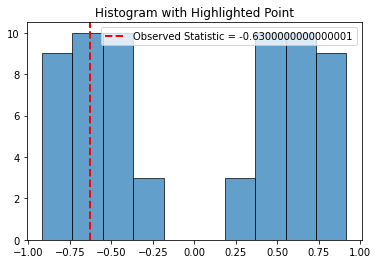

In [ ]:
A = {"T1", "T3"}
B = {"T2", "T4"}
treatment = {"T1", "T2"}


metric = "Average Score"
agg_fn = "mean"

perm_data, p_left, p_two, p_right, obs_stat = perm_test(exp1_data, A, B, treatment, metric, agg_fn)

print(f"Observed Statistic: {obs_stat}")
print(f"p-value left: {p_left}")
print(f"p-value two-sided: {p_two}")
print(f"p-value right: {p_right}")


plt.hist(perm_data['diff'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Statistic = {obs_stat}')

# plt.xlabel('Value')
# plt.ylabel('Frequency')
plt.title('Histogram with Highlighted Point')
plt.legend()

plt.show()

Fridge test weight (not ranked)

Observed Statistic: 0.3666666666666667
p-value left: 1
p-value two-sided: 1
p-value right: 0.6031746031746031


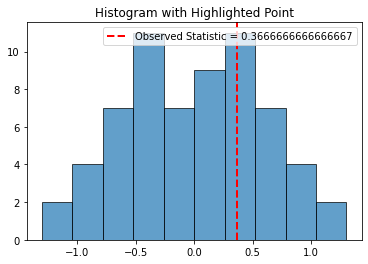

In [ ]:
A = {"T1", "T3"}
B = {"T2", "T4"}
treatment = {"T1", "T2"}


metric = "Weight Delta"
agg_fn = "mean"

perm_data, p_left, p_two, p_right, obs_stat = perm_test(exp1_data, A, B, treatment, metric, agg_fn)

print(f"Observed Statistic: {obs_stat}")
print(f"p-value left: {p_left}")
print(f"p-value two-sided: {p_two}")
print(f"p-value right: {p_right}")


plt.hist(perm_data['diff'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Statistic = {obs_stat}')

# plt.xlabel('Value')
# plt.ylabel('Frequency')
plt.title('Histogram with Highlighted Point')
plt.legend()

plt.show()

Fridge Photo test

c:\Users\garma\OneDrive\Desktop\STATS 604\Project 3\stat604project3\permutation_code\permutation_test.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  obs_stat = float(stats.loc[stats["perm_id"] == 0, "diff"])


Observed Statistic: -0.07742716182415069
p-value left: 0.2222222222222222
p-value two-sided: 0.2222222222222222
p-value right: 1


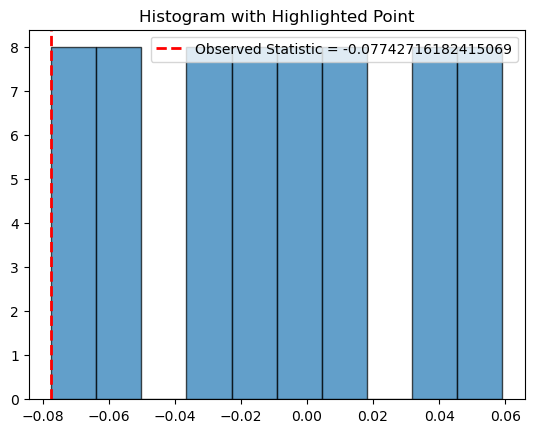

In [ ]:
A = {"T1", "T3"}
B = {"T2", "T4"}
treatment = {"T1", "T2"}


metric = "Photo Freshness Delta"
agg_fn = "mean"

perm_data, p_left, p_two, p_right, obs_stat = perm_test(exp1_data_photo, A, B, treatment, metric, agg_fn)

print(f"Observed Statistic: {obs_stat}")
print(f"p-value left: {p_left}")
print(f"p-value two-sided: {p_two}")
print(f"p-value right: {p_right}")


plt.hist(perm_data['diff'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Statistic = {obs_stat}')

# plt.xlabel('Value')
# plt.ylabel('Frequency')
plt.title('Histogram with Highlighted Point')
plt.legend()

plt.show()

Combined Data with experiment 2!

Water test smell (not ranked)

Observed Statistic: 1.4992592592592595
p-value left: 1
p-value two-sided: 0.03467643467643468
p-value right: 0.03467643467643468


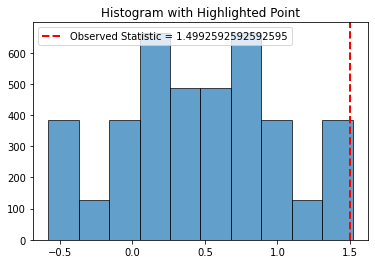

In [ ]:
A = {"T1", "T2"}
B = {"T3", "T4"}
treatment = {"T1", "T3"}


metric = "Average Score"
agg_fn = "mean"

perm_data, p_left, p_two, p_right, obs_stat = perm_test(exp12_data, A, B, treatment, metric, agg_fn)

print(f"Observed Statistic: {obs_stat}")
print(f"p-value left: {p_left}")
print(f"p-value two-sided: {p_two}")
print(f"p-value right: {p_right}")


plt.hist(perm_data['diff'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Statistic = {obs_stat}')

# plt.xlabel('Value')
# plt.ylabel('Frequency')
plt.title('Histogram with Highlighted Point')
plt.legend()

plt.show()

Water test weight (not ranked)

Observed Statistic: 1.1222222222222218
p-value left: 1
p-value two-sided: 0.026862026862026864
p-value right: 0.026862026862026864


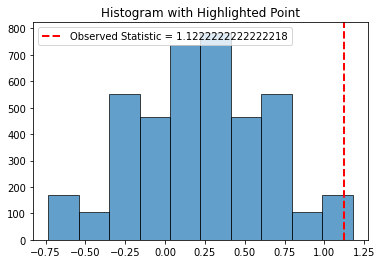

In [ ]:
A = {"T1", "T2"}
B = {"T3", "T4"}
treatment = {"T1", "T3"}


metric = "Weight Delta"
agg_fn = "mean"

perm_data, p_left, p_two, p_right, obs_stat = perm_test(exp12_data, A, B, treatment, metric, agg_fn)

print(f"Observed Statistic: {obs_stat}")
print(f"p-value left: {p_left}")
print(f"p-value two-sided: {p_two}")
print(f"p-value right: {p_right}")


plt.hist(perm_data['diff'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Statistic = {obs_stat}')

# plt.xlabel('Value')
# plt.ylabel('Frequency')
plt.title('Histogram with Highlighted Point')
plt.legend()

plt.show()

Water Photo test

Observed Statistic: 0.03240239078916002
p-value left: 1
p-value two-sided: 0.06202686202686203
p-value right: 0.06202686202686203


c:\Users\garma\OneDrive\Desktop\STATS 604\Project 3\stat604project3\permutation_code\permutation_test.py:76: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  obs_stat = float(stats.loc[stats["perm_id"] == 0, "diff"])


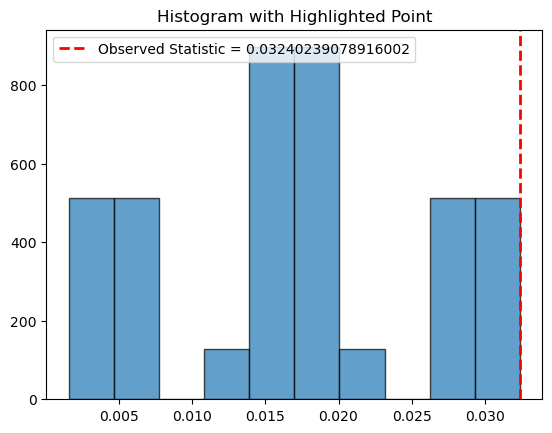

In [ ]:
A = {"T1", "T2"}
B = {"T3", "T4"}
treatment = {"T1", "T3"}


metric = "Photo Freshness Delta"
agg_fn = "mean"

perm_data, p_left, p_two, p_right, obs_stat = perm_test(exp12_data_photo, A, B, treatment, metric, agg_fn)

print(f"Observed Statistic: {obs_stat}")
print(f"p-value left: {p_left}")
print(f"p-value two-sided: {p_two}")
print(f"p-value right: {p_right}")


plt.hist(perm_data['diff'], bins=10, edgecolor='black', alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2, label=f'Observed Statistic = {obs_stat}')

# plt.xlabel('Value')
# plt.ylabel('Frequency')
plt.title('Histogram with Highlighted Point')
plt.legend()

plt.show()

# Segment images and compute the freshness index
## Experiment 2

In [11]:
import sys
from pathlib import Path

def find_project_root(start: Path) -> Path:
    for path in [start] + list(start.parents):
        if (path / "src").is_dir():
            return path
    raise FileNotFoundError("Could not locate project root containing 'src'.")

PROJECT_ROOT = find_project_root(Path.cwd())
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import cv2
import pandas as pd
from src.segmentation import compute_basil_metrics
import matplotlib.pyplot as plt

from src import basil_mask_color_refined, save_metrics_csv
from src.segmentation import run_pipeline


,value
basil_pixels,1.875025e+06
coverage_fraction,1.537817e-01
mean_R,1.144134e+02
mean_G,1.712355e+02
mean_B,1.035698e+02
std_R,3.890352e+01
std_G,5.121071e+01
std_B,6.237651e+01
mean_hue_deg,1.132020e+02
mean_saturation,1.275279e+02


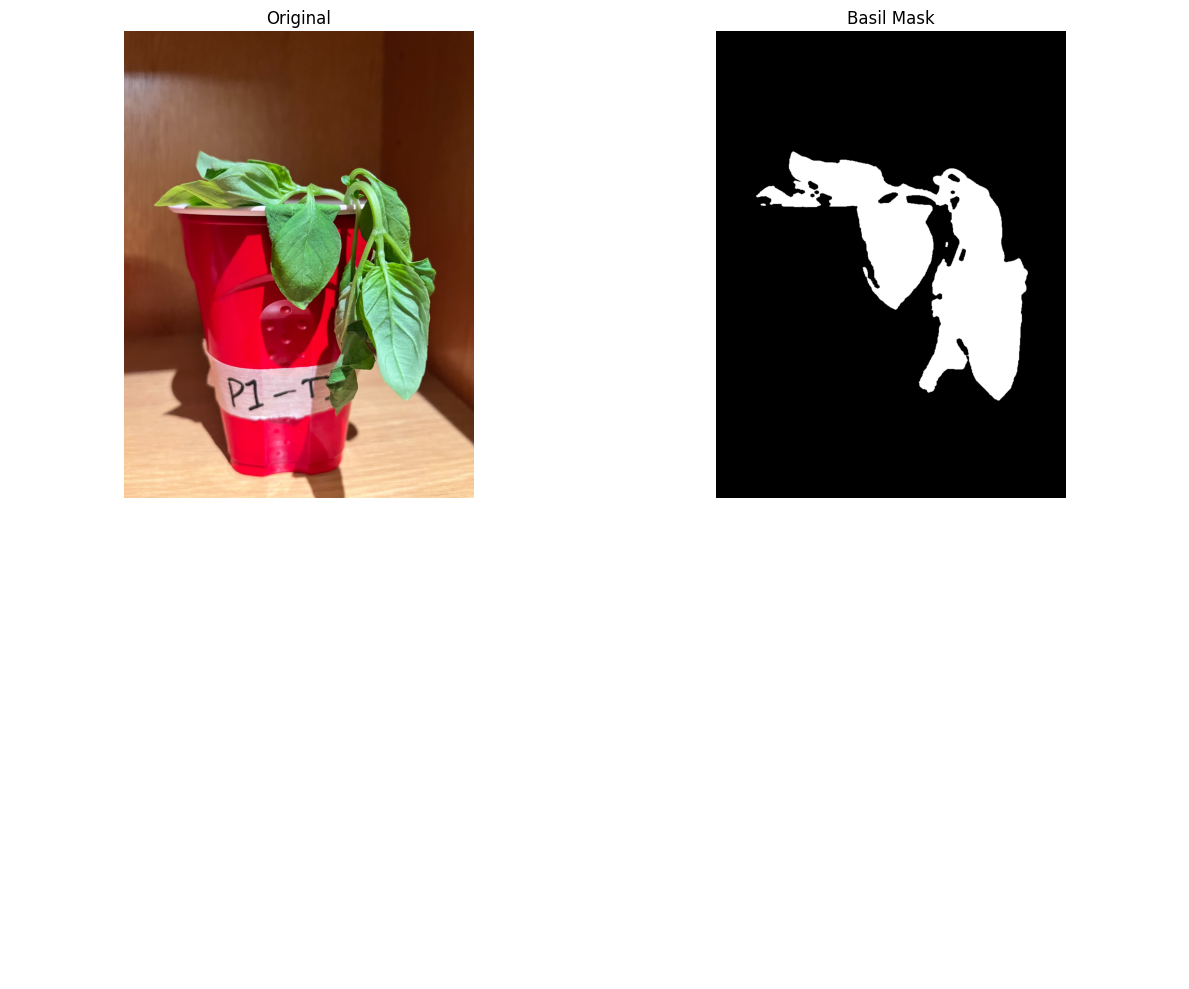

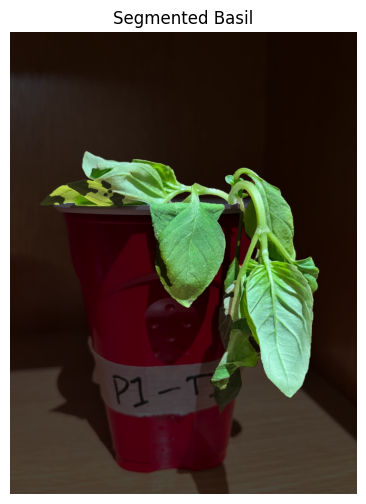

In [ ]:
# Example of output of the segmentation pipeline for a basil image
# Update this to match an image in the Images/ directory

IMAGE_ID = "P2T0D0"  # Example image ID for segmentation
IMAGE_PATH = PROJECT_ROOT / "Images" / f"{IMAGE_ID}.png"
METRICS_DIR = PROJECT_ROOT / "metrics"

if not IMAGE_PATH.exists():
    raise FileNotFoundError(
        "Update IMAGE_ID so it matches a file in Images/. Current value: "
        f"{IMAGE_PATH.resolve()}"
    )

result = run_pipeline(IMAGE_PATH, grabcut=True)
result.metrics

display(result.metrics.to_frame("value"))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

axes[0].imshow(result.image_rgb)
axes[0].set_title("Original")

axes[1].imshow(result.basil_mask, cmap="gray")
axes[1].set_title("Basil Mask")

for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()

# Overlay original with basil segmentation (non-basil tinted)
rgb = result.image_rgb
mask = (result.basil_mask > 0).astype(np.uint8)
overlay = rgb.copy()
tinted = (overlay * 0.3).astype(np.uint8)
overlay[mask == 0] = tinted[mask == 0]
plt.figure(figsize=(6, 6))
plt.imshow(overlay)
plt.title('Segmented Basil')
plt.axis('off')
plt.show()

In [3]:
IMAGE_DIR = PROJECT_ROOT / "processed_data"
IMAGE_PATHS = sorted(IMAGE_DIR.glob('*top.png'))
len(IMAGE_PATHS)


144

In [4]:
METRICS_DIR = PROJECT_ROOT / "processed_metrics_v2"
METRICS_DIR.mkdir(parents=True, exist_ok=True)

existing_csvs = sorted(METRICS_DIR.glob('*.csv'))
loaded_metrics = []
for csv_path in existing_csvs:
    df = pd.read_csv(csv_path)
    if 'image_id' in df.columns:
        df = df.set_index('image_id')
    else:
        df.index = [csv_path.stem]
    loaded_metrics.append(df)

if loaded_metrics:
    metrics_df = pd.concat(loaded_metrics)
    print(f"Loaded {len(loaded_metrics)} metric files from {METRICS_DIR}")
else:
    metrics_df = pd.DataFrame()
    print(f"No existing metrics found in {METRICS_DIR}. Run the next cell to compute them.")

metrics_df


Loaded 138 metric files from c:\Users\Filip\604 proj. 4\processed_metrics_v2


,basil_pixels,coverage_fraction,mean_R,mean_G,mean_B,std_R,std_G,std_B,mean_hue_deg,mean_saturation,mean_value,std_saturation,std_value,mean_lab_L,mean_lab_a,mean_lab_b,freshness_index
image_id,,,,,,,,,,,,,,,,,
exp2_day(0)_pot(4)_plant(1)_top,109030.0,0.008942,59.507246,76.000138,26.191424,15.519672,15.443391,12.757566,80.142034,169.792176,76.000523,25.982830,15.444815,76.025846,-15.373228,26.689232,0.343526
exp2_day(0)_pot(4)_plant(2)_top,559719.0,0.045906,58.145457,77.191702,17.290592,15.138522,14.921800,13.852947,79.234845,201.739564,77.192080,31.368152,14.924163,76.626002,-17.408371,31.064134,0.388619
exp2_day(0)_pot(4)_plant(3)_top,1344833.0,0.110298,56.329628,76.749793,17.343055,13.272863,13.500396,12.917219,80.663803,201.422032,76.749963,32.142623,13.501553,75.940216,-18.008661,30.708692,0.387988
exp2_day(0)_pot(4)_plant(4)_top,514540.0,0.042200,57.622039,75.073992,19.848813,17.276002,17.039222,16.114425,79.026979,193.588248,75.074301,35.550861,17.041031,74.648778,-16.297404,29.051224,0.375681
exp2_day(0)_pot(4)_plant(5)_top,232194.0,0.019044,50.917758,64.833075,24.189510,19.517823,18.431663,19.964581,80.345108,168.112940,64.834384,43.475163,18.436016,64.361771,-13.215458,22.215195,0.330421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exp2_day(5)_pot(6)_plant(2)_top,29526.0,0.002422,48.749306,50.609497,16.572987,16.940785,17.053636,13.321671,63.066992,180.417463,50.745241,39.136636,17.039351,51.124263,-6.559202,20.096661,0.330747
exp2_day(5)_pot(6)_plant(3)_top,18965.0,0.001555,65.076193,66.694543,27.606591,22.884705,21.491871,20.477271,63.560032,161.961983,67.184287,50.883218,21.790030,69.176641,-7.038967,22.522225,0.323209
exp2_day(5)_pot(6)_plant(4)_top,252787.0,0.020733,57.905612,68.245740,13.105425,19.786693,17.407354,15.840638,71.470883,213.542156,68.317948,40.230046,17.524846,68.572597,-12.815256,29.336837,0.395820


In [ ]:
import numpy as np

# Segment images and compute metrics, saving to CSV

force_recompute = True  # Set True to rerun segmentation and refresh metrics

if force_recompute or metrics_df.empty:
    all_metrics = []
    for image_path in IMAGE_PATHS:
        try:
            bgr = cv2.imread(str(image_path))
            if bgr is None:
                print(f'Could not read {image_path.name}; skipping.')
                continue
            mask = basil_mask_color_refined(bgr, down_long=1000, k_clusters=3)
            rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
            metrics_series = compute_basil_metrics(rgb, (mask > 0).astype(np.uint8))
            metrics_series.name = image_path.stem
            csv_path = METRICS_DIR / f"{image_path.stem}.csv"
            save_metrics_csv(metrics_series, image_path.stem, csv_path)
            all_metrics.append(metrics_series)
        except Exception as exc:
            print(f"Skipping {image_path.name} due to error: {exc}") # in some images the basil may be too small or hard to detect
            continue

    metrics_df = pd.DataFrame(all_metrics)
else:
    print('Using metrics loaded from disk; toggle force_recompute to refresh.')

metrics_df


Skipping exp2_day(4)_pot(6)_plant(7)_top.png due to error: Basil mask is empty; ensure segmentation succeeded before computing metrics.
Skipping exp2_day(4)_pot(6)_plant(8)_top.png due to error: Basil mask is empty; ensure segmentation succeeded before computing metrics.
Skipping exp2_day(5)_pot(4)_plant(1)_top.png due to error: Basil mask is empty; ensure segmentation succeeded before computing metrics.
Skipping exp2_day(5)_pot(5)_plant(8)_top.png due to error: Basil mask is empty; ensure segmentation succeeded before computing metrics.
Skipping exp2_day(5)_pot(6)_plant(7)_top.png due to error: Basil mask is empty; ensure segmentation succeeded before computing metrics.
Skipping exp2_day(5)_pot(6)_plant(8)_top.png due to error: Basil mask is empty; ensure segmentation succeeded before computing metrics.


,basil_pixels,coverage_fraction,mean_R,mean_G,mean_B,std_R,std_G,std_B,mean_hue_deg,mean_saturation,mean_value,std_saturation,std_value,mean_lab_L,mean_lab_a,mean_lab_b,freshness_index
exp2_day(0)_pot(4)_plant(1)_top,109030.0,0.008942,59.507246,76.000138,26.191424,15.519672,15.443391,12.757566,80.142034,169.792176,76.000523,25.982830,15.444815,76.025846,-15.373228,26.689232,0.343526
exp2_day(0)_pot(4)_plant(2)_top,559719.0,0.045906,58.145457,77.191702,17.290592,15.138522,14.921800,13.852947,79.234845,201.739564,77.192080,31.368152,14.924163,76.626002,-17.408371,31.064134,0.388619
exp2_day(0)_pot(4)_plant(3)_top,1344833.0,0.110298,56.329628,76.749793,17.343055,13.272863,13.500396,12.917219,80.663803,201.422032,76.749963,32.142623,13.501553,75.940216,-18.008661,30.708692,0.387988
exp2_day(0)_pot(4)_plant(4)_top,514540.0,0.042200,57.622039,75.073992,19.848813,17.276002,17.039222,16.114425,79.026979,193.588248,75.074301,35.550861,17.041031,74.648778,-16.297404,29.051224,0.375681
exp2_day(0)_pot(4)_plant(5)_top,232194.0,0.019044,50.917758,64.833075,24.189510,19.517823,18.431663,19.964581,80.345108,168.112940,64.834384,43.475163,18.436016,64.361771,-13.215458,22.215195,0.330421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
exp2_day(5)_pot(6)_plant(2)_top,29526.0,0.002422,48.749306,50.609497,16.572987,16.940785,17.053636,13.321671,63.066992,180.417463,50.745241,39.136636,17.039351,51.124263,-6.559202,20.096661,0.330747
exp2_day(5)_pot(6)_plant(3)_top,18965.0,0.001555,65.076193,66.694543,27.606591,22.884705,21.491871,20.477271,63.560032,161.961983,67.184287,50.883218,21.790030,69.176641,-7.038967,22.522225,0.323209
exp2_day(5)_pot(6)_plant(4)_top,252787.0,0.020733,57.905612,68.245740,13.105425,19.786693,17.407354,15.840638,71.470883,213.542156,68.317948,40.230046,17.524846,68.572597,-12.815256,29.336837,0.395820
exp2_day(5)_pot(6)_plant(5)_top,109970.0,0.009019,63.402201,66.855397,29.825707,27.380060,26.026862,27.028630,65.053269,160.187187,67.140566,56.543986,26.353437,68.585432,-7.760535,21.110803,0.322900


In [6]:
# save metrics_df using pandas
metrics_csv_path = "all_metrics_final.csv"
metrics_df.to_csv(metrics_csv_path)

In [7]:
# Compute percentage changes in freshness index and mean blue channel from day 0 to day 5

def extract_day_pot_plant(name):
    parts = name.split('_')
    day = pot = plant = None
    for part in parts:
        if part.startswith('day('):
            day = int(part[4:-1])
        elif part.startswith('pot('):
            pot = int(part[4:-1])
        elif part.startswith('plant('):
            plant = int(part[6:-1])
    return day, pot, plant

def compute_percentage_changes(df):
    records = []
    for name, row in df.iterrows():
        day, pot, plant = extract_day_pot_plant(name)
        records.append({
            'image_id': name,
            'day': day,
            'pot': pot,
            'plant': plant,
            'freshness_index': row.get('freshness_index'),
            'mean_B': row.get('mean_B')
        })
    full_df = pd.DataFrame(records)
    pivot = full_df.pivot_table(index=['pot', 'plant'], columns='day', values=['freshness_index', 'mean_B'])
    if not {('freshness_index', 0), ('freshness_index', 5), ('mean_B', 0), ('mean_B', 5)} <= set(pivot.columns):
        print('Day 0 or Day 5 data missing for some pots/plants.')
        return pd.DataFrame(columns=['pct_change_freshness', 'pct_change_mean_B'])
    freshness_day0 = pivot['freshness_index'][0]
    freshness_day5 = pivot['freshness_index'][5]
    meanB_day0 = pivot['mean_B'][0]
    meanB_day5 = pivot['mean_B'][5]
    pct_freshness = ((freshness_day5 - freshness_day0) / freshness_day0.replace(0, pd.NA)) * 100
    pct_meanB = ((meanB_day5 - meanB_day0) / meanB_day0.replace(0, pd.NA)) * 100
    changes_df = pd.DataFrame({
        'pct_change_freshness': pct_freshness,
        'pct_change_mean_B': pct_meanB
    }).dropna()
    return changes_df

changes_df = compute_percentage_changes(metrics_df)
changes_df

pct_change_freshness  pct_change_mean_B
pot plant                                         
4   2                 -5.193282          18.861437
    3                 -1.311313         -15.887588
    4                  1.392056          -8.118072
    5                 18.667606         -44.453091
    6                  6.232846          -4.398243
    7                  3.277052          -5.001292
    8                -12.817482          -2.425629
5   1                  2.804519         -31.268289
    2                  0.149700         -10.982776
    3                 -7.122774           6.351204
    4                  2.398037           8.435979
    5                 -4.675358         -11.064637
    6                 -7.830636          57.112651
    7                -18.522583          91.083934
6   1                 -4.397178         106.013718
    2                -16.897804          27.929572
    3                -17.989334          82.283586
    4                 -3.529670          31.422730
    5                -15.981236         148.178789
    6                 -6.637944         108.420537

In [8]:
# Map pots and plants to treatment groups and analyze differences
# treatment_map: (pot, plant) -> assignment (0=control, 1=water)

treatment_map = {
    (4, 1): 0, (4, 2): 0, (4, 3): 1, (4, 4): 0,
    (4, 5): 1, (4, 6): 1, (4, 7): 1, (4, 8): 0,
    (5, 1): 1, (5, 2): 1, (5, 3): 0, (5, 4): 1,
    (5, 5): 0, (5, 6): 1, (5, 7): 0, (5, 8): 0,
    (6, 1): 1, (6, 2): 0, (6, 3): 0, (6, 4): 1,
    (6, 5): 1, (6, 6): 1, (6, 7): 0, (6, 8): 0,
}

if not changes_df.empty:
    changes_with_treatment = changes_df.copy()
    treatments = []
    for pot, plant in changes_with_treatment.index:
        assignment = treatment_map.get((pot, plant))
        treatments.append('water' if assignment == 1 else 'control')
    changes_with_treatment['treatment'] = treatments

    summary_stats = changes_with_treatment.groupby('treatment')[['pct_change_freshness', 'pct_change_mean_B']].agg(['mean', 'std', 'count'])
    display(summary_stats)

    if set(changes_with_treatment['treatment']) >= {'water', 'control'}:
        mean_water = changes_with_treatment.loc[changes_with_treatment['treatment'] == 'water', ['pct_change_freshness', 'pct_change_mean_B']].mean()
        mean_control = changes_with_treatment.loc[changes_with_treatment['treatment'] == 'control', ['pct_change_freshness', 'pct_change_mean_B']].mean()
        diff = mean_water - mean_control
        print('Mean difference (water - control):')
        print(diff)
    else:
        print('Not enough treatment groups to compute differences.')
else:
    print('No percentage change data available.')

pct_change_freshness                 pct_change_mean_B             \
                          mean       std count              mean        std   
treatment                                                                     
control             -10.228320  7.378332     8         25.612674  39.980646   
water                -0.513185  8.543149    12         28.966094  62.212280   

                 
          count  
treatment        
control       8  
water        12

Mean difference (water - control):
pct_change_freshness    9.715135
pct_change_mean_B       3.353419
dtype: float64


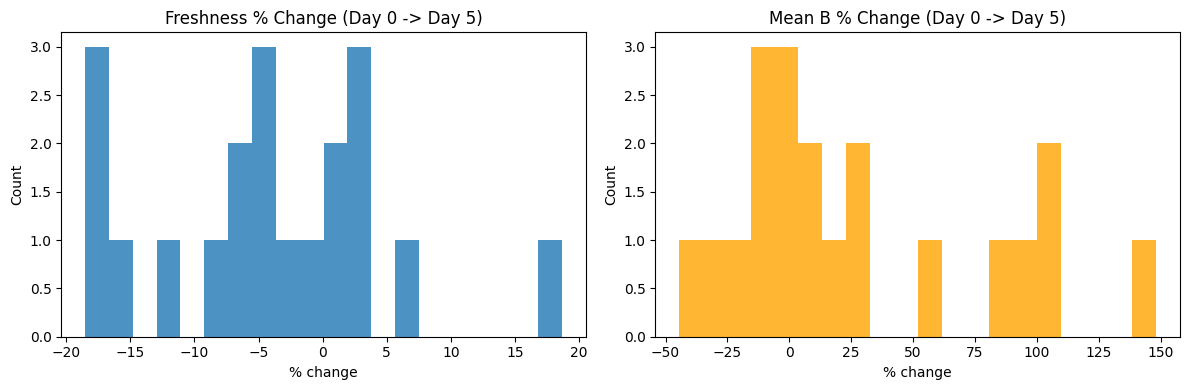

In [9]:
# Visualize percentage changes with histograms
if not changes_df.empty:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(changes_df['pct_change_freshness'], bins=20, alpha=0.8)
    axes[0].set_title('Freshness % Change (Day 0 -> Day 5)')
    axes[0].set_xlabel('% change')
    axes[0].set_ylabel('Count')

    axes[1].hist(changes_df['pct_change_mean_B'], bins=20, alpha=0.8, color='orange')
    axes[1].set_title('Mean B % Change (Day 0 -> Day 5)')
    axes[1].set_xlabel('% change')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print('Insufficient data for percentage change computation.')


In [ ]:
# Function to preview refined color masks for the images
# the output is suppressed to avoid excessive figures during normal runs

def preview_refined_color_masks(image_paths, *, down_long=1000, k_clusters=3, use_subset=None):
    paths = image_paths[:use_subset] if use_subset else image_paths
    for img_path in paths:
        bgr = cv2.imread(str(img_path))
        if bgr is None:
            print(f'Skip unreadable: {img_path}')
            continue
        mask = basil_mask_color_refined(bgr, down_long=down_long, k_clusters=k_clusters)
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f"{img_path.name} (down_long={down_long}, k={k_clusters})")
        axes[0].imshow(rgb)
        axes[0].set_title('Original RGB')
        axes[0].axis('off')

        axes[1].imshow(mask, cmap='gray')
        axes[1].set_title('Refined Color Mask')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

# Preview subset (set use_subset to limit figures)
# preview_refined_color_masks(IMAGE_PATHS, down_long=1000, k_clusters=3)

## Experiment 1

Run the segmentation pipeline on a labeled image (e.g., `P1T1D1.jpg`), inspect the masks, and export freshness metrics to CSV.

In [ ]:
import sys
from pathlib import Path

def find_project_root(start: Path) -> Path:
    for path in [start] + list(start.parents):
        if (path / "src").is_dir():
            return path
    raise FileNotFoundError("Could not locate project root containing 'src'.")

PROJECT_ROOT = find_project_root(Path.cwd())
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.segmentation import run_pipeline, save_metrics_csv


In [15]:
all_metrics = []
for image_path in sorted((PROJECT_ROOT / "Images").glob("P*T*D*.png")):
    try:
        res = run_pipeline(image_path, grabcut=True)
        csv_path = METRICS_DIR / f"{image_path.stem}.csv"
        save_metrics_csv(res.metrics, image_path.stem, csv_path)
        series = res.metrics.copy()
        series.name = image_path.stem
        all_metrics.append(series)
    except: # skip images that cause errors
        print(f"Skipping {image_path.name} due to error.")
        continue

pd.DataFrame(all_metrics)

Skipping P1T1D4.png due to error.
Skipping P1T2D4.png due to error.
Skipping P1T2D5.png due to error.
Skipping P2T1D2.png due to error.
Skipping P2T1D3.png due to error.
Skipping P2T1D4.png due to error.
Skipping P2T2D3.png due to error.
Skipping P2T2D4.png due to error.
Skipping P2T2D5.png due to error.
Skipping P3T1D4.png due to error.
Skipping P3T1D5.png due to error.
Skipping P3T2D4.png due to error.


,basil_pixels,coverage_fraction,mean_R,mean_G,mean_B,std_R,std_G,std_B,mean_hue_deg,mean_saturation,mean_value,std_saturation,std_value,mean_lab_L,mean_lab_a,mean_lab_b,freshness_index
P1T0D0,782068.0,0.064142,95.362802,143.194960,96.434255,52.027951,68.458132,61.664004,118.951145,119.159053,143.486615,54.478679,68.349407,137.839903,-25.019140,19.680997,0.380542
P1T1D1,98388.0,0.008069,175.299223,189.710209,149.638675,29.674848,30.281441,35.772129,82.861568,56.278083,189.710259,20.968698,30.281446,190.633248,-11.979174,18.738464,0.356355
P1T1D2,28929.0,0.002373,45.699817,54.553735,9.729337,24.630636,26.175661,22.419624,72.839573,221.432092,54.554115,45.388066,26.176722,53.145563,-10.903350,23.526288,0.395870
P1T1D3,14285.0,0.001172,162.289254,185.337907,135.137557,28.281334,30.899109,28.847927,87.389289,70.605810,185.342387,11.810448,30.893705,184.414771,-16.812881,22.972349,0.365303
P1T1D5,33515.0,0.002749,107.901925,116.642996,89.533761,32.583422,34.487749,32.499139,79.304729,63.846636,116.659436,21.512233,34.492009,120.770312,-8.434074,13.944353,0.261161
P1T2D1,1698642.0,0.139316,60.123284,72.266292,28.255929,18.951319,19.777342,18.493792,78.638716,163.003969,72.267096,47.542903,19.778943,72.819150,-12.620612,23.889277,0.331430
P1T2D2,466602.0,0.038269,49.029807,60.066605,24.623021,18.908864,22.198759,21.201379,80.413680,162.672307,60.067670,52.513012,22.199078,59.546374,-11.034794,19.451680,0.318762
P1T2D3,243947.0,0.020008,54.141281,64.794578,41.380755,12.540741,15.812064,19.509476,93.183208,101.379841,64.794988,46.909780,15.812826,65.831406,-9.039213,12.796976,0.240513
P1T3D1,1996179.0,0.163718,90.037340,132.877354,72.783075,35.476695,47.407423,43.849791,103.783523,129.127882,132.886103,45.396960,47.405348,129.124197,-26.174709,27.464931,0.367737
P1T3D2,981612.0,0.080508,88.556277,109.746639,80.794227,35.086239,41.106856,45.087638,106.715731,85.314895,109.798598,43.080294,41.012167,110.826411,-13.630986,13.871909,0.284133
